[예제] 파이썬의 데이타 주무르기


# 서울시 자치구 인구대비 CCTV 현황

1. 서울시 자치구 연도별 CCTV 현황

    서울열린데이타 : https://data.seoul.go.kr 에서 cctv 검색하여 csv 파일 다운로드
    

2. 서울시 주민등록인구 (구별) 통계

    서울열린데이타 : https://data.seoul.go.kr > 인구 > XLS 파일 다운로드

## 1. 서울시 자치구 연도별 CCTV 현황

In [1]:
import pandas as pd
import numpy as np

cctvSeoul = pd.read_csv('./data/cctv_in_seoul.csv',encoding='utf-8')
cctvSeoul.index = np.arange(1, len(cctvSeoul) + 1)
cctvSeoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
1,강남구,3238,1292,430,584,932
2,강동구,1010,379,99,155,377
3,강북구,831,369,120,138,204
4,강서구,911,388,258,184,81
5,관악구,2109,846,260,390,613
6,광진구,878,573,78,53,174
7,구로구,1884,1142,173,246,323
8,금천구,1348,674,51,269,354
9,노원구,1566,542,57,451,516
10,도봉구,825,238,159,42,386


### (1) CCTV가 많은 순으로 정렬하여 상위 5위

In [2]:
cctvSeoul.sort_values('소계', ascending=False)[:5]

,기관명,소계,2013년도 이전,2014년,2015년,2016년
1,강남구,3238,1292,430,584,932
19,양천구,2482,1843,142,30,467
15,서초구,2297,1406,157,336,398
5,관악구,2109,846,260,390,613
22,은평구,2108,1138,224,278,468


### (2) 2014~2016년 3년간 CCTV 증가율을 추가
- 3년동안의 증가율 = ( 2014년 + 2015년 + 2016년 ) / 2013년도 이전 * 100
- 3년간 증가율 높은 순으로 출력

In [3]:
def inc_rate(a, b, c, d):
    return (a + b + c) / d * 100

cctvSeoul['3년간증가율'] = cctvSeoul.apply(lambda x : inc_rate(x['2014년'], x['2015년'], x['2016년'], x['2013년도 이전']), axis=1)
cctvSeoul.sort_values('3년간증가율', ascending=False)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,3년간증가율
23,종로구,1619,464,314,211,630,248.922414
10,도봉구,825,238,159,42,386,246.638655
13,마포구,980,314,118,169,379,212.101911
9,노원구,1566,542,57,451,516,188.929889
2,강동구,1010,379,99,155,377,166.490765
20,영등포구,1277,495,214,195,373,157.979798
1,강남구,3238,1292,430,584,932,150.619195
5,관악구,2109,846,260,390,613,149.290780
24,중구,1023,413,190,72,348,147.699758
12,동작구,1302,544,341,103,314,139.338235


## 2. 서울시 주민등록인구 (구별) 통계

[ 파일읽기 ]  

popsSeoul = pd.read_excel('./dataset/pops_in_seoul.xls')

수정하고 데이타 정리

---
[ 출력결과 ]  popsSeoul.head(5)

<img src='images/그림1.PNG' width='80%' height='100'>

In [4]:
popsSeoul = pd.read_excel('./data/pops_in_seoul.xls', header=3, usecols=[1, 3, 6, 9, 13], names=['구별', '인구수', '한국인', '외국인', '고령자'])
popsSeoul.index = np.arange(1, len(popsSeoul) + 1)
popsSeoul

,구별,인구수,한국인,외국인,고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619
6,동대문구,364338,348052,16286,57165
7,중랑구,408147,403209,4938,61830
8,성북구,447687,435868,11819,67782
9,강북구,322915,319164,3751,58196
10,도봉구,341649,339413,2236,55964


In [5]:
def rate(a, b):
    return b / a * 100

popsSeoul['외국인비율'] = popsSeoul.apply(lambda x: rate(x['인구수'], x['외국인']), axis=1)
popsSeoul['고령자비율'] = popsSeoul.apply(lambda x: rate(x['인구수'], x['고령자']), axis=1)
popsSeoul.head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163026,153065,9961,26742,6.110068,16.403518
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624
4,성동구,316463,308221,8242,42767,2.604412,13.514060
5,광진구,371063,355559,15504,45619,4.178266,12.294139


##  3. 두 데이타프레임을 합치고 분석
- 두 데이타프레임의 행과 열의 수 확인 (shape)
- 연결 (mergy 함수)

    먼저 합치고 필요한 컬럼을 추출하기보단 각각 필요한 컬럼을 추리고 나서 합치는 것을 권장
              
[ 출력결과 ]
<img src='images/그림2.PNG'>

In [6]:
cctvSeoul.shape

(25, 7)

In [7]:
popsSeoul.shape

(25, 7)

In [8]:
cctvSeoul = cctvSeoul[['기관명', '소계', '3년간증가율']]
cctvSeoul

,기관명,소계,3년간증가율
1,강남구,3238,150.619195
2,강동구,1010,166.490765
3,강북구,831,125.203252
4,강서구,911,134.793814
5,관악구,2109,149.290780
6,광진구,878,53.228621
7,구로구,1884,64.973730
8,금천구,1348,100.000000
9,노원구,1566,188.929889
10,도봉구,825,246.638655


In [9]:
popsSeoul
popsSeoul.columns = ['기관명', '인구수', '한국인', '외국인', '고령자', '외국인비율', '고령자비율']
popsSeoul

,기관명,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163026,153065,9961,26742,6.110068,16.403518
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624
4,성동구,316463,308221,8242,42767,2.604412,13.514060
5,광진구,371063,355559,15504,45619,4.178266,12.294139
6,동대문구,364338,348052,16286,57165,4.470025,15.690101
7,중랑구,408147,403209,4938,61830,1.209858,15.148954
8,성북구,447687,435868,11819,67782,2.640014,15.140489
9,강북구,322915,319164,3751,58196,1.161606,18.022080
10,도봉구,341649,339413,2236,55964,0.654473,16.380554


In [10]:
result = pd.merge(cctvSeoul, popsSeoul, left_on='기관명', right_on='기관명')
result.index = np.arange(1, len(result) + 1)
result

,기관명,소계,3년간증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020
2,강동구,1010,166.490765,431920,427573,4347,58770,1.006436,13.606686
3,강북구,831,125.203252,322915,319164,3751,58196,1.161606,18.022080
4,강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241
5,관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970
6,광진구,878,53.228621,371063,355559,15504,45619,4.178266,12.294139
7,구로구,1884,64.973730,438486,404497,33989,61801,7.751445,14.094179
8,금천구,1348,100.000000,254021,233917,20104,35739,7.914306,14.069309
9,노원구,1566,188.929889,548160,543752,4408,77096,0.804145,14.064507
10,도봉구,825,246.638655,341649,339413,2236,55964,0.654473,16.380554


## 4. 분석하기 
- 외국인비율, 고령자비율, 인구수와 CCTV 수와 상관있나?
- 상관계수로 확인 : numpy.corrcoef()

    0.1이하 상관없음, 0.3이하 약한 상관관계, 0.7이하 뚜렷한 상관관계

In [11]:
print(np.corrcoef(result['소계'], result['외국인비율']))
print(np.corrcoef(result['소계'], result['고령자비율']))
print(np.corrcoef(result['소계'], result['인구수']))

[[ 1.         -0.05057013]
 [-0.05057013  1.        ]]
[[ 1.         -0.27474224]
 [-0.27474224  1.        ]]
[[1.         0.22152789]
 [0.22152789 1.        ]]


## 5. 시각화로 분석을 보여주기

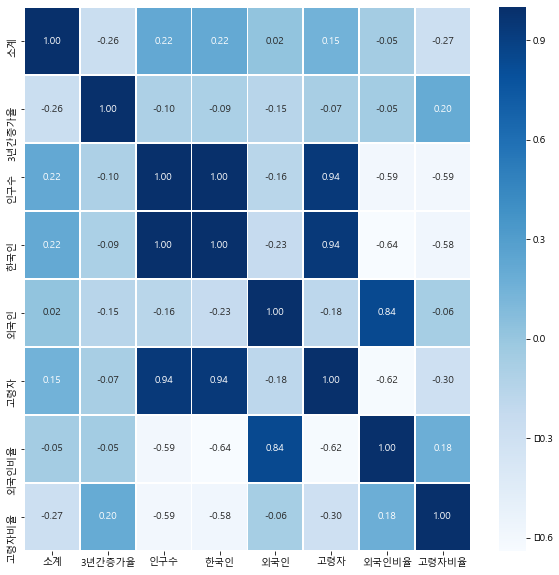

In [13]:
import seaborn as sns                
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# 한글깨짐처리
font_loc = "c:/Windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_loc).get_name()
rc('font', family=font_name)

plt.figure(figsize=(10, 10))

sns.heatmap(data = result.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues');